In [1]:
#### Q1. Explain the difference between linear regression and logistic regression models. Provide an example of a scenario where logistic regression would be more appropriate.


# Linear Regression vs Logistic Regression

## Linear Regression
"""
Linear regression is a supervised learning algorithm used for predicting a continuous target variable. 
The relationship between the input features (independent variables) and the target variable (dependent variable) is assumed to be linear. 
The goal is to find the best-fitting line that minimizes the sum of the squared differences between the actual values and the predicted values.
"""

# Linear regression equation:
# y = β0 + β1*X1 + β2*X2 + ... + βn*Xn + ε
# where y is the predicted value, X1, X2, ..., Xn are the input features, 
# β0 is the intercept, β1, β2, ..., βn are the coefficients, and ε is the error term.

## Logistic Regression
"""
Logistic regression is also a supervised learning algorithm, but it is used for classification problems, particularly binary classification. 
Instead of predicting a continuous value, logistic regression predicts the probability that a given input belongs to a certain class (e.g., yes/no, spam/not spam). 
The output of logistic regression is between 0 and 1, which can be interpreted as a probability.
"""

# Logistic regression equation:
# p = 1 / (1 + e^-(β0 + β1*X1 + β2*X2 + ... + βn*Xn))
# where p is the probability that the input belongs to a certain class, 
# X1, X2, ..., Xn are the input features, β0 is the intercept, and β1, β2, ..., βn are the coefficients.

# The output probability can be converted to a binary outcome by setting a threshold, typically 0.5:
# If p >= 0.5, predict class 1 (positive class)
# If p < 0.5, predict class 0 (negative class)

## Example Scenario for Logistic Regression

"""
Consider a scenario where a bank wants to predict whether a customer will default on a loan. 
The target variable is binary: "default" (1) or "no default" (0). 
Input features might include the customer's income, credit score, and current debt. 
Since the goal is to predict whether the customer will default (a binary outcome), logistic regression is more appropriate than linear regression.
"""

# In summary:
# - Use linear regression when the target variable is continuous.
# - Use logistic regression when the target variable is categorical (typically binary).

# Example code to fit a logistic regression model using scikit-learn:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# Load a dataset (e.g., breast cancer dataset)
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Print the first 10 predictions
print("First 10 predictions:", y_pred[:10])



First 10 predictions: [1 0 0 1 1 0 0 0 1 1]


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [2]:
## Q2. What is the cost function used in logistic regression, and how is it optimized?

# Cost Function in Logistic Regression

## Introduction
"""
In logistic regression, the cost function measures how well the model's predictions align with the actual outcomes. 
The cost function is crucial because it guides the optimization process, helping the model to find the best set of parameters (coefficients) that minimize the error in predictions.
"""

## Log Loss (Binary Cross-Entropy)
"""
The cost function used in logistic regression is known as Log Loss, also called Binary Cross-Entropy Loss. 
Log Loss quantifies the difference between the predicted probability (p) and the actual label (y) for a binary classification problem.
"""

# Log Loss for a single training example:
# Cost = - [y*log(p) + (1-y)*log(1-p)]
# where:
# - y is the actual label (0 or 1),
# - p is the predicted probability that the output is 1.

# The overall cost function (J) for the entire dataset is the average of the individual log losses:
# J(θ) = - (1/m) * Σ [y(i)*log(p(i)) + (1-y(i))*log(1-p(i))]
# where:
# - m is the number of training examples,
# - y(i) is the actual label for the ith example,
# - p(i) is the predicted probability for the ith example,
# - θ represents the model parameters (coefficients).

## Optimization Using Gradient Descent
"""
To minimize the cost function, logistic regression typically uses an optimization algorithm called Gradient Descent. 
Gradient Descent iteratively adjusts the model parameters to reduce the cost function by computing the gradient (partial derivatives) of the cost function with respect to the parameters.
"""

# Gradient Descent update rule for parameter θ_j:
# θ_j := θ_j - α * (∂J(θ)/∂θ_j)
# where:
# - α is the learning rate (a small positive number that controls the step size),
# - ∂J(θ)/∂θ_j is the partial derivative of the cost function with respect to parameter θ_j.

## Example of Logistic Regression Optimization

"""
Let's illustrate how logistic regression is optimized using gradient descent with an example.
"""

import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the logistic regression model using gradient descent
model = LogisticRegression(max_iter=1000, solver='saga')  # 'saga' solver uses Stochastic Gradient Descent
model.fit(X_train, y_train)

# Print the cost (Log Loss) on the training set
from sklearn.metrics import log_loss

# Predicted probabilities
y_train_pred_proba = model.predict_proba(X_train)

# Calculate the log loss
cost = log_loss(y_train, y_train_pred_proba)
print("Log Loss (Cost) on the training set:", cost)


Log Loss (Cost) on the training set: 0.24383040073690945


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [6]:
### Q3. Explain the concept of regularization in logistic regression and how it helps prevent overfitting.
# Regularization in Logistic Regression

## Introduction to Regularization
"""
Regularization is a technique used to prevent overfitting in machine learning models by adding a penalty to the cost function. 
In the context of logistic regression, regularization discourages the model from becoming too complex by shrinking the coefficients (parameters) towards zero.
This helps the model generalize better to unseen data, reducing the risk of overfitting.
"""

## Types of Regularization
"""
There are two common types of regularization used in logistic regression:
1. L1 Regularization (Lasso)
2. L2 Regularization (Ridge)

Both add a penalty term to the cost function, but they differ in how they penalize the coefficients.
"""

### L1 Regularization (Lasso)
"""
L1 regularization adds the absolute value of the coefficients as a penalty to the cost function. 
This can lead to sparse models where some of the coefficients are exactly zero, effectively performing feature selection.
"""

# L1 Regularization Cost Function:
# J(θ) = - (1/m) * Σ [y(i)*log(p(i)) + (1-y(i))*log(1-p(i))] + λ * Σ |θ_j|
# where:
# - λ is the regularization parameter (controls the strength of the penalty),
# - |θ_j| is the absolute value of the coefficient θ_j.

### L2 Regularization (Ridge)
"""
L2 regularization adds the squared value of the coefficients as a penalty to the cost function. 
This encourages the model to spread the "weight" more evenly across all features, preventing any single feature from dominating.
"""

# L2 Regularization Cost Function:
# J(θ) = - (1/m) * Σ [y(i)*log(p(i)) + (1-y(i))*log(1-p(i))] + λ * Σ θ_j^2
# where:
# - λ is the regularization parameter,
# - θ_j^2 is the square of the coefficient θ_j.

### Impact of Regularization on Overfitting
"""
Without regularization, the model may fit the training data too closely, capturing noise and leading to overfitting. 
Regularization introduces a trade-off between fitting the training data well and keeping the model's complexity low. 
By tuning the regularization parameter λ, we can control the balance between underfitting and overfitting.
"""

## Example of Regularization in Logistic Regression

"""
Let's illustrate the impact of regularization on a logistic regression model using the L2 penalty (Ridge).
"""

import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the logistic regression model with L2 regularization
model = LogisticRegression(penalty='l2', C=1.0, max_iter=1000)  # C is the inverse of the regularization strength λ
model.fit(X_train, y_train)

# Predict on the test set
y_test_pred = model.predict(X_test)

# Calculate accuracy and log loss
accuracy = accuracy_score(y_test, y_test_pred)
y_test_pred_proba = model.predict_proba(X_test)
cost = log_loss(y_test, y_test_pred_proba)

print("Accuracy on the test set:", accuracy)
print("Log Loss (Cost) on the test set:", cost)

"""
By adjusting the regularization strength (λ), controlled by the parameter C (where λ = 1/C), we can find a model that performs well on both the training and test sets, 
indicating good generalization and reduced overfitting.
"""

# Example of tuning the regularization parameter C:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(LogisticRegression(penalty='l2', max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best regularization parameter (C):", grid_search.best_params_['C'])
print("Best cross-validation accuracy:", grid_search.best_score_)



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy on the test set: 0.9707602339181286
Log Loss (Cost) on the test set: 0.07360115926546647


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best regularization parameter (C): 100
Best cross-validation accuracy: 0.9597151898734179


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


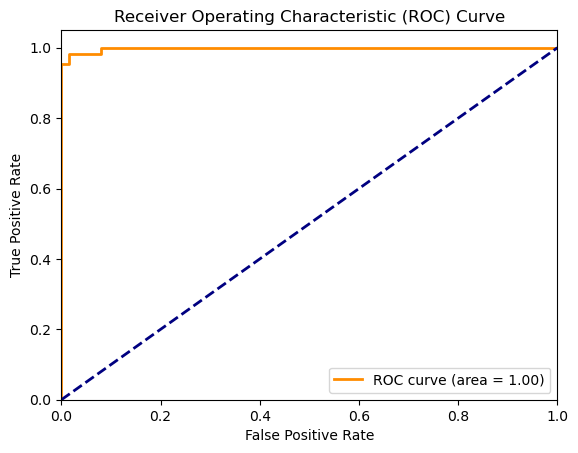

"\nThe ROC curve for the logistic regression model is plotted above. \nThe AUC-ROC score is also computed, providing a summary metric for the model's performance.\n"

In [8]:
#### Q4. What is the ROC curve, and how is it used to evaluate the performance of the logistic regression model?
# ROC Curve and Evaluating Logistic Regression Model Performance

## Introduction to ROC Curve
"""
The Receiver Operating Characteristic (ROC) curve is a graphical representation used to evaluate the performance of a binary classification model, such as logistic regression. 
The ROC curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings.
"""

### Key Concepts:
#- **True Positive Rate (TPR)**: Also known as sensitivity or recall, TPR is the proportion of actual positives that are correctly identified by the model.
#  - TPR = TP / (TP + FN)
#- **False Positive Rate (FPR)**: FPR is the proportion of actual negatives that are incorrectly identified as positives by the model.
 # - FPR = FP / (FP + TN)

### ROC Curve:
"""
- The ROC curve is generated by varying the threshold for the decision rule of the logistic regression model (i.e., the cutoff probability that determines whether a prediction is classified as 0 or 1).
- Each point on the ROC curve corresponds to a specific threshold value, with the TPR on the y-axis and the FPR on the x-axis.
- A model with good performance will have an ROC curve that is close to the top left corner, indicating a high TPR and a low FPR.
"""

## Area Under the ROC Curve (AUC)
"""
- The Area Under the ROC Curve (AUC-ROC) is a single scalar value that summarizes the overall performance of the model.
- AUC ranges from 0 to 1, with a value of 0.5 representing a model with no discrimination ability (random guessing), and a value of 1.0 representing a perfect model.
- Higher AUC values indicate better model performance.
"""

## Example: Plotting the ROC Curve for Logistic Regression

import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict the probabilities on the test set
y_test_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class (1)

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)

# Compute the AUC-ROC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

"""
The ROC curve for the logistic regression model is plotted above. 
The AUC-ROC score is also computed, providing a summary metric for the model's performance.
"""

# Interpretation:
# - The closer the ROC curve is to the top-left corner, the better the model's performance.
# - The AUC-ROC score summarizes the model's ability to distinguish between the positive and negative classes. 
# - A higher AUC-ROC value indicates that the model has a good trade-off between sensitivity and specificity.


In [ ]:
#### Q7. Can you discuss some common issues and challenges that may arise when implementing logistic regression, and how they can be addressed? For example, what can be done if there is multicollinearityamong the independent variables?



